In [20]:
import numpy as np
import pandas as pd

df=pd.read_csv("/Users/vineethpetnakota/desktop/603/flipkart_product_final.csv",encoding="unicode_escape")
df.head()

,ProductName,Price(Rs),Rating,Review,Summary
0,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Super!,Great cooler.. excellent air flow and for this...
1,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Awesome,Best budget 2 fit cooler. Nice cooling
2,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,The quality is good but the power of air is de...
3,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",1.0,Useless product,Very bad product it's a only a fan
4,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,Ok ok product


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ProductName  189870 non-null  object 
 1   Price(Rs)    189869 non-null  object 
 2   Rating       189869 non-null  float64
 3   Review       189866 non-null  object 
 4   Summary      189856 non-null  object 
dtypes: float64(1), object(4)
memory usage: 7.2+ MB


In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #visualize
from textblob import TextBlob
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import re
import wordcloud
from PIL import Image


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ProductName  189870 non-null  object 
 1   Price(Rs)    189869 non-null  object 
 2   Rating       189869 non-null  float64
 3   Review       189866 non-null  object 
 4   Summary      189856 non-null  object 
dtypes: float64(1), object(4)
memory usage: 7.2+ MB


In [24]:
def extract_price(p):
    expression = r'\d+'
    match = re.findall(expression,p)
    return ''.join(match)

df['Price(Rs)'] = df['Price(Rs)'].astype(str)
df['ExtractedPrice'] = df['Price(Rs)'].apply(extract_price)
df.head()

,ProductName,Price(Rs),Rating,Review,Summary,ExtractedPrice
0,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Super!,Great cooler.. excellent air flow and for this...,3999
1,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999
2,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,The quality is good but the power of air is de...,3999
3,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",1.0,Useless product,Very bad product it's a only a fan,3999
4,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,Ok ok product,3999


In [25]:
df['Rating'].unique()

array([ 5.,  3.,  1.,  4.,  2., nan])

In [26]:
df['Summary'] = df['Summary'].astype(str)

In [27]:
subjectivity_list = []
polarity_list = []
for review in df['Summary']:
    tb = TextBlob(review)
    subjectivity_list.append(tb.sentiment.subjectivity)
    polarity_list.append(tb.sentiment.polarity)
    
#Add the result to the DataFrame
df['Subjectivity'] = subjectivity_list
df['Polarity'] = polarity_list
df.head()

,ProductName,Price(Rs),Rating,Review,Summary,ExtractedPrice,Subjectivity,Polarity
0,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Super!,Great cooler.. excellent air flow and for this...,3999,0.812500,0.725000
1,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999,0.566667,0.666667
2,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,The quality is good but the power of air is de...,3999,0.633333,0.433333
3,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",1.0,Useless product,Very bad product it's a only a fan,3999,0.933333,-0.455000
4,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,Ok ok product,3999,0.500000,0.500000


In [28]:
def sentiment_analysis(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['Sentiment'] = df['Polarity'].apply(sentiment_analysis)
df.head()

,ProductName,Price(Rs),Rating,Review,Summary,ExtractedPrice,Subjectivity,Polarity,Sentiment
0,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Super!,Great cooler.. excellent air flow and for this...,3999,0.812500,0.725000,Positive
1,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999,0.566667,0.666667,Positive
2,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,The quality is good but the power of air is de...,3999,0.633333,0.433333,Positive
3,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",1.0,Useless product,Very bad product it's a only a fan,3999,0.933333,-0.455000,Negative
4,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,Ok ok product,3999,0.500000,0.500000,Positive


In [29]:
df.head(20)

,ProductName,Price(Rs),Rating,Review,Summary,ExtractedPrice,Subjectivity,Polarity,Sentiment
0,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Super!,Great cooler.. excellent air flow and for this...,3999,0.812500,0.725000,Positive
1,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999,0.566667,0.666667,Positive
2,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,The quality is good but the power of air is de...,3999,0.633333,0.433333,Positive
3,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",1.0,Useless product,Very bad product it's a only a fan,3999,0.933333,-0.455000,Negative
4,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Fair,Ok ok product,3999,0.500000,0.500000,Positive
5,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Awesome,The cooler is really fantastic and provides go...,3999,0.680000,0.420000,Positive
6,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",5.0,Highly recommended,Very good product,3999,0.780000,0.910000,Positive
7,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",3.0,Nice,Very nice,3999,1.000000,0.780000,Positive
8,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",1.0,Unsatisfactory,Very bad cooler,3999,0.866667,-0.910000,Negative
9,"Candes 12 L Room/Personal Air Cooler(White, Bl...","3,999",4.0,Worth the money,Very good,3999,0.780000,0.910000,Positive


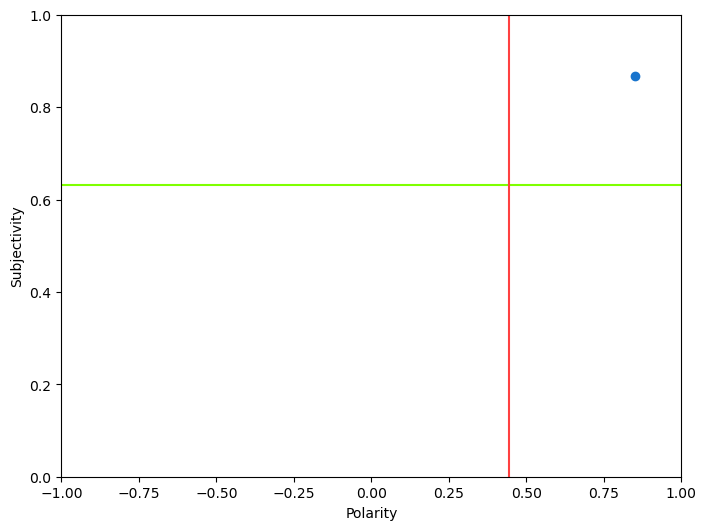

In [30]:
#Visualization of the sentiment analysis

plt.figure(figsize=(8,6))
plt.scatter(df.Polarity[10], df.Subjectivity[10], color = '#1874CD')
plt.axhline(y = np.mean(df.Subjectivity), color = '#7FFF00')
plt.axvline(x = np.mean(df.Polarity), color = '#FF4040')
plt.xlabel("Polarity")
plt.xlim((-1, 1))
plt.ylabel("Subjectivity")
plt.ylim((0, 1))
plt.show()

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

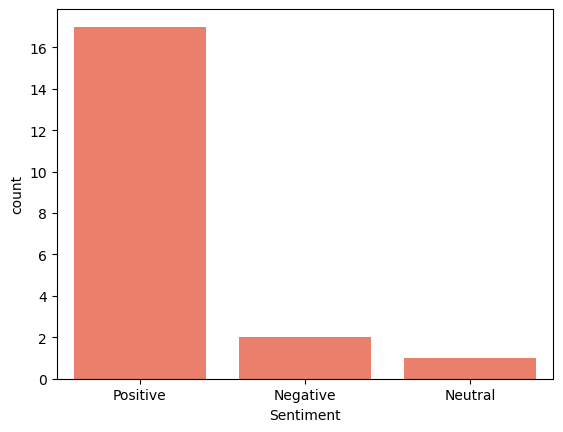

In [31]:
sns.countplot(x=df.head(20)["Sentiment"], color = '#FF7256')

In [32]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

ignored_words = set(stopwords.words("english"))
ignored_words.add("bad")
ignored_words.add("good")
ignored_words.add("flipkart")
ignored_words.add("also")
ignored_words.add("like")
ignored_words.add("item")
ignored_words.add("one")
ignored_words.add("much")
ignored_words.add("even")
ignored_words.add("product")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vineethpetnakota/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vineethpetnakota/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


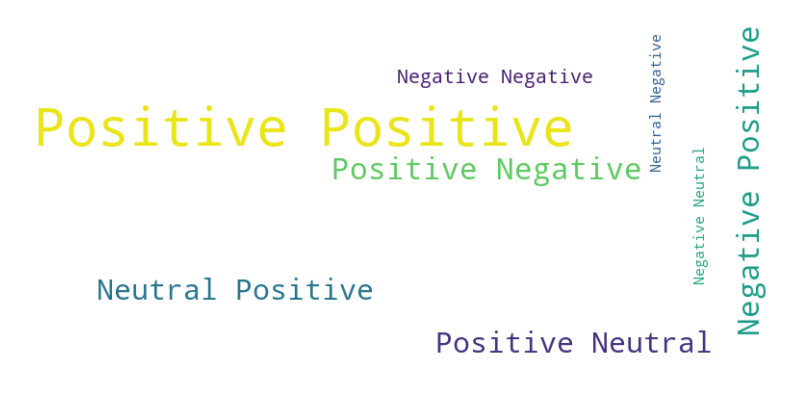

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


text_column = df['Sentiment'] 

# Concatenate the text from the selected column
text = ' '.join(text_column)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
df.to_csv("/Users/vineethpetnakota/desktop/603/flipkart_tableau.csv", index=False)
